# PERSONAL PROJECT

In this notebook, I will investigate the data available to us by the Open Data initiative of the French goverment.  The focus will be on house prices within France, and more specifically within Paris.  

Data is open source and is not bound by any commercial or usage constraints.  The data will be downloaded through the site, on this link: https://www.data.gouv.fr/fr/datasets/demandes-de-valeurs-foncieres/




## Importing libraries


In [31]:
#Set up
import sys
from pathlib import Path
import sklearn
import chardet

#webscraping
from lxml import html, etree
import requests
import urllib

#data science
import pandas as pd
import numpy as np
import seaborn as sns

In [23]:
# check packages versions
print("\n# check packages versions\n")

print("python: " + sys.version)

print("sklearn: " + sklearn.__version__)


# check packages versions

python: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
sklearn: 0.22.1


## Useful Functions

In [24]:
def check_filePath (filePath_varString, filePath):
    """
    Checks if the file exists and prints the value, else exits.
    """
    if not filePath.exists():
        print("ERROR, " + filePath_varString + " not found!!!")
        sys.exit()
    print(filePath_varString + ": " + filePath._str)

In [25]:
def download(url: str, dest_folder: str, filename: str):
    if not os.path.exists(dest_folder):
        os.makedirs(dest_folder)  # create folder if it does not exist

    #filename = url.split('/')[-1].replace(" ", "_")  # be careful with file names
    file_path = os.path.join(dest_folder, filename)

    r = requests.get(url, stream=True)
    if r.ok:
        print("saving to", os.path.abspath(file_path))
        with open(file_path, 'wb') as f:
            for chunk in r.iter_content(chunk_size=1024 * 8):
                if chunk:
                    f.write(chunk)
                    f.flush()
                    os.fsync(f.fileno())
    else:  # HTTP status code 4XX/5XX
        print("Download failed: status code {}\n{}".format(r.status_code, r.text))

In [26]:
def detect_encoding (filePath):
    """
    Returns the encoding of the file
    """
    with open(filePath, mode='rb') as f:
        # result = chardet.detect(f.read(100000))
        detector = chardet.universaldetector.UniversalDetector()
        count = 0
        for line in f.readlines():
            detector.feed(line)
            count += 1
            if count == 1000: break
            if detector.done: break
        detector.close()
        # print(detector.result)\n",
    # print(filePath._str, "\n Encoding: ", result['encoding'])

    # return result['encoding']
    return detector.result['encoding']

## Set up directories

In [27]:
# Set Data Folder Paths depending on User
print("\n# Set Data Folder Paths for project\n")

# Set Workdir folder where projects are developed
workdir_folder = Path("/workspaces/hsbc-gpmo-account")
if not workdir_folder.exists():
    workdir_folder = Path("C:\\Users\\rodri\\OneDrive\\Documents\\Data Science Projects - Personal")
check_filePath("workdir_folder", workdir_folder)


# Set Source folders where data sources for project are stored
sources_folder = Path("/workspaces/hsbc-gpmo-account")
if not sources_folder.exists():
    sources_folder = Path("C:\\Users\\rodri\\OneDrive\\Documents\\Data Science Projects - Personal\\House Prices Paris - Datasources")
check_filePath("sources_folder", sources_folder)


# Set Data Folder Paths for project

workdir_folder: C:\Users\rodri\OneDrive\Documents\Data Science Projects - Personal
sources_folder: C:\Users\rodri\OneDrive\Documents\Data Science Projects - Personal\House Prices Paris - Datasources


## Scraping data

To keep this notebook up to date and relevant, the data download will be automated to fetch directly from the site. This ensures I'm able to have access to any new datasets that are updated to the website.


Looking through the datasets, their names are structured and consistent.  At the time of writing this, the naming convention follows:

    valeursfoncieres-year-extra

The extra component is included for cases where the dataset does not cover a full year.


In [7]:
# Get the original webpage html content
webpageLink = 'https://www.data.gouv.fr/fr/datasets/demandes-de-valeurs-foncieres/'
page = requests.get(webpageLink)
# convert the data received into searchable HTML
extractedHtml = html.fromstring(page.content)
# use an XPath query to find the datasets link 
# to do this, we search for all download button links and get datasetlink
dataSrc = extractedHtml.xpath('//div[@class="resource-card-actions btn-toolbar"]/a/@href')  
# I'll assume the documentation for the data set will be limited to the 4 links already located at the bottom of the website plus 4 download links for misc resources. So, the relevant files to keep are all but the last 8
dataSrc
dataSrc2=dataSrc[:-8]
dataSrc2.reverse()

In [8]:
#It's now ready to download the files and combine them
len(dataSrc2)
start_year=2015
i=0

#for each file, download and name it accordingly
for link in dataSrc2:
    download(link, dest_folder="House Prices Paris - Datasources", filename="valuers_foncieres_"+str(start_year+i))
    i=i+1

saving to c:\Users\rodri\OneDrive\Documents\Data Science Projects - Personal\House Prices Paris - Datasources\valuers_foncieres_2015
saving to c:\Users\rodri\OneDrive\Documents\Data Science Projects - Personal\House Prices Paris - Datasources\valuers_foncieres_2016
saving to c:\Users\rodri\OneDrive\Documents\Data Science Projects - Personal\House Prices Paris - Datasources\valuers_foncieres_2017
saving to c:\Users\rodri\OneDrive\Documents\Data Science Projects - Personal\House Prices Paris - Datasources\valuers_foncieres_2018
saving to c:\Users\rodri\OneDrive\Documents\Data Science Projects - Personal\House Prices Paris - Datasources\valuers_foncieres_2019
saving to c:\Users\rodri\OneDrive\Documents\Data Science Projects - Personal\House Prices Paris - Datasources\valuers_foncieres_2020


# Create Master Dataset

In [9]:
prices=pd.DataFrame()

for i in range(len(dataSrc2)):
    source_file= sources_folder/str("valuers_foncieres_"+str(start_year+i))
    #load dataset
    df = pd.read_csv(source_file,sep= '|',encoding=detect_encoding(source_file))
    df["Year_Price"]=str(start_year+i)
    prices=prices.append(df)

In [11]:
prices.head()

Code service CH  Reference document  1 Articles CGI  2 Articles CGI  \
0              NaN                 NaN             NaN             NaN   
1              NaN                 NaN             NaN             NaN   
2              NaN                 NaN             NaN             NaN   
3              NaN                 NaN             NaN             NaN   
4              NaN                 NaN             NaN             NaN   

   3 Articles CGI  4 Articles CGI  5 Articles CGI  No disposition  \
0             NaN             NaN             NaN               1   
1             NaN             NaN             NaN               1   
2             NaN             NaN             NaN               1   
3             NaN             NaN             NaN               1   
4             NaN             NaN             NaN               1   

  Date mutation Nature mutation  ... Nombre de lots  Code type local  \
0    01/07/2015           Vente  ...              0              1.0   
1    01/07/2015           Vente  ...              0              1.0   
2    01/07/2015           Vente  ...              0              NaN   
3    01/07/2015           Vente  ...              0              1.0   
4    01/07/2015           Vente  ...              2              2.0   

    Type local Identifiant local Surface reelle bati  \
0       Maison               NaN                85.0   
1       Maison               NaN               116.0   
2          NaN               NaN                 NaN   
3       Maison               NaN                50.0   
4  Appartement               NaN                29.0   

  Nombre pieces principales  Nature culture Nature culture speciale  \
0                       4.0               S                     NaN   
1                       6.0               S                     NaN   
2                       NaN               J                     NaN   
3                       4.0               S                     NaN   
4                       1.0             NaN                     NaN   

  Surface terrain  Year_Price  
0           932.0        2015  
1           185.0        2015  
2           302.0        2015  
3           176.0        2015  
4             NaN        2015  

[5 rows x 44 columns]

In [15]:
prices.to_csv(sources_folder / "valuers_foncieres_combined",index=True)


## Load dataset

In [28]:
source_file= sources_folder/"valuers_foncieres_combined"
df = pd.read_csv(source_file,sep= ',',encoding=detect_encoding(source_file))

In [30]:
df

Unnamed: 0  Code service CH  Reference document  1 Articles CGI  \
0                  0              NaN                 NaN             NaN   
1                  1              NaN                 NaN             NaN   
2                  2              NaN                 NaN             NaN   
3                  3              NaN                 NaN             NaN   
4                  4              NaN                 NaN             NaN   
...              ...              ...                 ...             ...   
15152576      827100              NaN                 NaN             NaN   
15152577      827101              NaN                 NaN             NaN   
15152578      827102              NaN                 NaN             NaN   
15152579      827103              NaN                 NaN             NaN   
15152580      827104              NaN                 NaN             NaN   

          2 Articles CGI  3 Articles CGI  4 Articles CGI  5 Articles CGI  \
0                    NaN             NaN             NaN             NaN   
1                    NaN             NaN             NaN             NaN   
2                    NaN             NaN             NaN             NaN   
3                    NaN             NaN             NaN             NaN   
4                    NaN             NaN             NaN             NaN   
...                  ...             ...             ...             ...   
15152576             NaN             NaN             NaN             NaN   
15152577             NaN             NaN             NaN             NaN   
15152578             NaN             NaN             NaN             NaN   
15152579             NaN             NaN             NaN             NaN   
15152580             NaN             NaN             NaN             NaN   

          No disposition Date mutation  ... Nombre de lots Code type local  \
0                      1    01/07/2015  ...              0             1.0   
1                      1    01/07/2015  ...              0             1.0   
2                      1    01/07/2015  ...              0             NaN   
3                      1    01/07/2015  ...              0             1.0   
4                      1    01/07/2015  ...              2             2.0   
...                  ...           ...  ...            ...             ...   
15152576               1    30/06/2020  ...              2             2.0   
15152577               1    26/06/2020  ...              2             2.0   
15152578               1    25/06/2020  ...              1             2.0   
15152579               1    23/06/2020  ...              3             2.0   
15152580               1    11/06/2020  ...              1             2.0   

           Type local Identifiant local Surface reelle bati  \
0              Maison               NaN                85.0   
1              Maison               NaN               116.0   
2                 NaN               NaN                 NaN   
3              Maison               NaN                50.0   
4         Appartement               NaN                29.0   
...               ...               ...                 ...   
15152576  Appartement               NaN                47.0   
15152577  Appartement               NaN               150.0   
15152578  Appartement               NaN                48.0   
15152579  Appartement               NaN                26.0   
15152580  Appartement               NaN                33.0   

         Nombre pieces principales Nature culture  Nature culture speciale  \
0                              4.0              S                      NaN   
1                              6.0              S                      NaN   
2                              NaN              J                      NaN   
3                              4.0              S                      NaN   
4                              1.0            NaN                      NaN   
...       

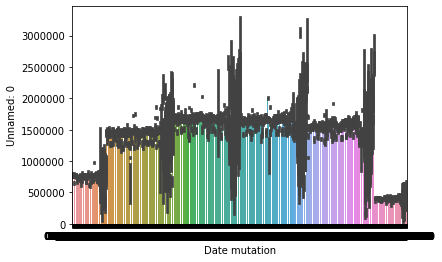

In [34]:
sns.barplot(x="Date mutation", y = "Unnamed: 0", data=df)